In [1]:
import csv
import statsmodels.api as sm
import copy
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.stats

# matplotlib Paramaters
from matplotlib import rc


sys.path.append('../src/')
from file_io import get_synfiles, load_synfile
from binary import get_presence, calc_norm_dens, calc_survival_fraction

In [2]:
rc("lines", linewidth=2)
rc("axes", lw=1)
rc("axes.spines", top=False)
rc("axes.spines", right=False)
rc("xtick.major", pad=5, width=1, size=5)
rc("ytick.major", pad=5, width=1, size=5)
rc("font", size=20)

# Figure 3C

Normalized density over 1-month of longitudinal imaging

Loaded 14 synfiles from ../data/synfiles/pyr
Loaded 21 synfiles from ../data/synfiles/pv


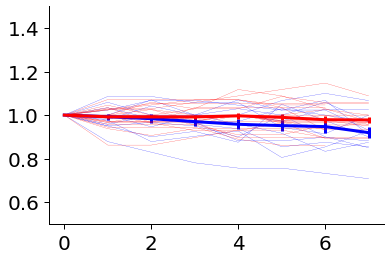

In [3]:
f,a = plt.subplots(1)

pyr_path = '../data/synfiles/pyr'
paths = get_synfiles(pyr_path)
norm_dens_agg = []

for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
    norm_dens = calc_norm_dens(binary)
    norm_dens_agg.append(norm_dens)
    a.plot(norm_dens,color='blue',linewidth=0.2)

a.errorbar(x=range(8),y=np.nanmean(norm_dens_agg,axis=0),yerr=scipy.stats.sem(norm_dens_agg,axis=0,nan_policy='omit'),color='b',linewidth=3)

pv_path = '../data/synfiles/pv'
paths = get_synfiles(pv_path)
norm_dens_agg = []

for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
    norm_dens = calc_norm_dens(binary)
    norm_dens_agg.append(norm_dens)
    a.plot(norm_dens,color='red',linewidth=0.2)

a.errorbar(x=range(8),y=np.nanmean(norm_dens_agg,axis=0),yerr=scipy.stats.sem(norm_dens_agg,axis=0,nan_policy='omit'),color='r',linewidth=3)
a.set_ylim(0.5,1.5)
plt.show()

# Figure 3D

Fraction of synapses present at each subsequent imaging timepoint

Loaded 14 synfiles from ../data/synfiles/pyr
Loaded 21 synfiles from ../data/synfiles/pv
594 Pyr syn
683 PV syn


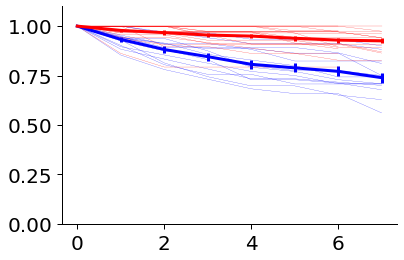

In [4]:
f,a = plt.subplots(1)

paths = get_synfiles(pyr_path)
sf_agg = []

n_pyr_syn = 0
n_pv_syn = 0

pyr_fracts = []
for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
    
    n = np.sum(binary[:,0])
    n_pyr_syn += n
    sf = calc_survival_fraction(binary)
    sf_agg.append(sf)
    pyr_fracts.append(sf[6])
    a.plot(sf,color='blue',linewidth=0.2)
    
a.errorbar(x=range(8),y=np.nanmean(sf_agg,axis=0),yerr=scipy.stats.sem(sf_agg,axis=0,nan_policy='omit'),color='b',linewidth=3)


paths = get_synfiles(pv_path)
sf_agg = []
pv_fracts= []

for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
    n_pv_syn += np.sum(binary[:,0])
    sf = calc_survival_fraction(binary)
    sf_agg.append(sf)
    pv_fracts.append(sf[6])
    a.plot(sf,color='red',linewidth=0.2)
    


a.errorbar(x=range(8),y=np.nanmean(sf_agg,axis=0),yerr=scipy.stats.sem(sf_agg,axis=0,nan_policy='omit'),color='r',linewidth=3)
a.set_ylim(0,1.1)

print('{} Pyr syn'.format(n_pyr_syn))
print('{} PV syn'.format(n_pv_syn))

In [5]:
print('Day 6 Ranksum: ',scipy.stats.ranksums(pv_fracts,pyr_fracts))
print('')
print('Mean Pyr Day 6 {}'.format(np.mean(pyr_fracts)))
print('SEM Pyr Day 6 {}'.format(scipy.stats.sem(pyr_fracts)))
print('')
print('Mean PV Day 6 {}'.format(np.mean(pv_fracts)))
print('SEM PV Day 6 {}'.format(scipy.stats.sem(pv_fracts)))

Day 6 Ranksum:  RanksumsResult(statistic=4.091117805436454, pvalue=4.29298977422107e-05)

Mean Pyr Day 6 0.7712880960728106
SEM Pyr Day 6 0.024619732068240845

Mean PV Day 6 0.9292672183906735
SEM PV Day 6 0.012436487753341822


# Figure 3E

Percentage of synapses that were added or eliminated

In [6]:
paths = get_synfiles(pyr_path)
pyr_dends = []
for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
        
    pyr_dends.append(binary)
    
paths = get_synfiles(pv_path)
pv_dends = []
for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
        
    pv_dends.append(binary)

Loaded 14 synfiles from ../data/synfiles/pyr
Loaded 21 synfiles from ../data/synfiles/pv


Calculate for Pyr

In [7]:
pyr_adds = []
pyr_elims = []

for i, dend in enumerate(pyr_dends):
    n_syn = np.sum(dend,axis=0)
    diff = np.diff(dend,axis=1)
    
    additions = np.sum(diff==1,axis=0)
    eliminations = np.sum(diff==-1,axis=0)
    
    fract_add = additions/n_syn[1:]
    fract_elim = eliminations/n_syn[:-1]
    
    avg_fract_add = np.mean(fract_add)
    avg_fract_elim = np.mean(fract_elim)
    
    pyr_adds.append(avg_fract_add)
    pyr_elims.append(avg_fract_elim)
    
pyr_adds = np.array(pyr_adds)
pyr_elims = np.array(pyr_elims)
pyr_dynamic = pyr_adds + pyr_elims

Calculate for PV

In [8]:
pv_adds = []
pv_elims = []

for i, dend in enumerate(pv_dends):
    n_syn = np.sum(dend,axis=0)
    diff = np.diff(dend,axis=1)
    
    additions = np.sum(diff==1,axis=0)
    eliminations = np.sum(diff==-1,axis=0)
    
    fract_add = additions/n_syn[1:]
    fract_elim = eliminations/n_syn[:-1]
    
    avg_fract_add = np.mean(fract_add)
    avg_fract_elim = np.mean(fract_elim)
    
    pv_adds.append(avg_fract_add)
    pv_elims.append(avg_fract_elim)
    
pv_adds = np.array(pv_adds)
pv_elims = np.array(pv_elims)
pv_dynamic = pv_adds +pv_elims

In [9]:
print('Fraction Pyr Dynamic: {} +- {}'.format(pyr_dynamic.mean(),scipy.stats.sem(pyr_dynamic)))
print('Fraction PV Dynamic: {} +- {}'.format(pv_dynamic.mean(),scipy.stats.sem(pv_dynamic)))

Fraction Pyr Dynamic: 0.1172389867007078 +- 0.009780679885502904
Fraction PV Dynamic: 0.02948326603921986 +- 0.0038863274453907522


RanksumsResult(statistic=4.815060462365538, pvalue=1.4715532747260245e-06)


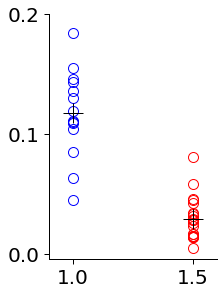

In [10]:
f,a = plt.subplots(1)
f.set_size_inches(3,4.5)
a.plot(np.ones(pyr_dynamic.shape),pyr_dynamic,'bo',markersize=10,fillstyle='none')
a.plot(np.ones(pv_dynamic.shape)*1.5,pv_dynamic,'ro',markersize=10,fillstyle='none')

a.plot(1,np.mean(pyr_dynamic),'k+',ms=20)
a.plot(1.5,np.mean(pv_dynamic),'k+',ms=20)

a.set_xlim(0.9,1.6)
a.set_yticks([0,.1,.2])

print(scipy.stats.ranksums(pyr_dynamic,pv_dynamic))

# Figure 3F

Sort synapses by weight on first day, plot survival-fractions for quartiles

In [11]:
DATAPATH = "../data/weights_by_dendrite/norm_pyr/"
files = os.listdir(DATAPATH)

weights = []

for f in files:
    if 'npy' in f:
        w = np.load(os.path.join(DATAPATH,f))
        weights.append(w[:,:7])

pyr_weights = np.concatenate(weights, axis=0)

DATAPATH = "../data/weights_by_dendrite/norm_pv/"
files = os.listdir(DATAPATH)

weights = []

for f in files:
    if 'npy' in f:
        w = np.load(os.path.join(DATAPATH,f))
        weights.append(w[:,:7])

pv_weights = np.concatenate(weights, axis=0)

### Pyramidal

(124, 7)
0.5
(124, 7)
0.6129032258064516
(124, 7)
0.8064516129032258
(124, 7)
0.9758064516129032


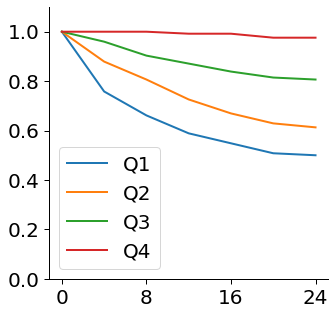

In [12]:
t_0 = pyr_weights[:,0]
sort_idxs = np.argsort(t_0)
pyr_sort = pyr_weights[sort_idxs,:7]
pyr_sort = pyr_sort[pyr_sort[:,0]>0]

n_syn = pyr_sort.shape[0]
quart = int(n_syn/4)

f,a = plt.subplots(1)
f.set_size_inches(5,5)
for i, quartile in enumerate(np.arange(0,n_syn,quart)):
    weights = pyr_sort[quartile:(quartile+quart)]
    binary = weights>0
    print(binary.shape)
    sf = np.mean(binary,axis=0)
    
    print(sf[6])
    a.plot(np.mean(binary,axis=0),label='Q{}'.format(i+1))

a.set_ylim(0,1.1)
a.set_xticks([0,2,4,6])
a.set_xticklabels([0,8,16,24])
plt.legend()

### PV+

(104, 7)
0.7692307692307693
(104, 7)
0.9230769230769231
(104, 7)
0.9807692307692307
(104, 7)
1.0


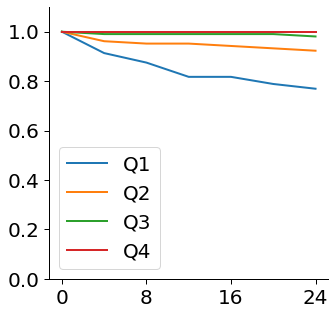

In [13]:
t_0 = pv_weights[:,0]
sort_idxs = np.argsort(t_0)
pv_sort = pv_weights[sort_idxs,:]
pv_sort = pv_sort[pv_sort[:,0]>0]

n_syn = pv_sort.shape[0]
quart = int(n_syn/4)

f,a = plt.subplots(1)
f.set_size_inches(5,5)

for i, quartile in enumerate(np.arange(0,n_syn,quart)):
    weights = pv_sort[quartile:(quartile+quart)]
    binary = weights>0
    print(binary.shape)
    sf = np.mean(binary,axis=0)
    
    print(sf[6])
    a.plot(np.mean(binary,axis=0),label='Q{}'.format(i+1))

a.set_ylim(0,1.1)
a.set_xticks([0,2,4,6])
a.set_xticklabels([0,8,16,24])
plt.legend()



# Figure 3G

Compare survival of newborn and pre-existing synapses for both cell-types

Loaded 14 synfiles from ../data/synfiles/pyr/
552
73
Loaded 21 synfiles from ../data/synfiles/pv/
441
14


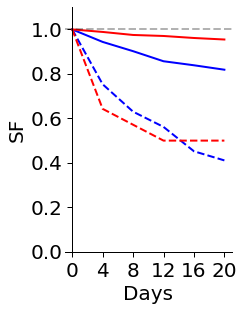

In [14]:
paths = get_synfiles('../data/synfiles/pyr/')

agg = []
for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
    agg.append(binary)

agg = np.concatenate(agg,axis=0)


d0s = []
d1s = []
d2s = []

for syn in agg:
    if (syn[0]==1) and (syn[1]==1):
        d0s.append(syn)
    elif (syn[0]==0) and (syn[1]==1):
        d1s.append(syn)
    elif (syn[1]==0) and (syn[2] == 1):
        d2s.append(syn)
        
pre_existing = np.vstack(d0s)[:,1:-1]

d1s = np.vstack(d1s)[:,1:-1]
d2s = np.vstack(d2s)[:,2:]
newborns = np.vstack([d1s,d2s])

print(pre_existing.shape[0])
print(newborns.shape[0])

sf_pre = calc_survival_fraction(pre_existing)
sf_new = calc_survival_fraction(newborns)

f,a = plt.subplots(1)
f.set_size_inches(3,4.5)

a.plot(sf_new,linestyle='--',color='blue')
a.plot(sf_pre,linestyle='-',color='blue')

paths = get_synfiles('../data/synfiles/pv/')

agg = []
for path in paths:
    data = load_synfile(path)
    binary = get_presence(data)
    if binary.shape[1]==8:
        agg.append(binary)

agg = np.concatenate(agg,axis=0)


d0s = []
d1s = []
d2s = []

for syn in agg:
    if (syn[0]==1) and (syn[1]==1):
        d0s.append(syn)
    elif (syn[0]==0) and (syn[1]==1):
        d1s.append(syn)
    elif (syn[1]==0) and (syn[2] == 1):
        d2s.append(syn)
        
pre_existing = np.vstack(d0s)[:,1:-1]

d1s = np.vstack(d1s)[:,1:-1]
d2s = np.vstack(d2s)[:,2:]
newborns = np.vstack([d1s,d2s])

print(pre_existing.shape[0])
print(newborns.shape[0])
sf_pre = calc_survival_fraction(pre_existing)
sf_new = calc_survival_fraction(newborns)

a.plot(sf_new,linestyle='--',color='red')
a.plot(sf_pre,linestyle='-',color='red')

a.set_ylim(0,1.1)
a.spines['left'].set_position(('data', 0))
a.spines['bottom'].set_position(('data', 0))
a.set_ylabel('SF')
a.set_xlabel('Days')
a.set_xticks([0,1,2,3,4,5])
a.set_xticklabels([0,4,8,12,16,20])
a.axhline(y=1,alpha=0.3,color='black',linestyle='--')
plt.show()